## Import some prerequirement

In [11]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
import datetime

## Set hyperparameters

In [2]:
IMG_WIDTH = None
IMG_HEIGHT = None
EPOCHS = None
BATCH_SIZE= None
n_classes = None

## Initialize train and test data

In [4]:
from google.colab import files
uploaded = files.upload()

Saving mnist.npz to mnist.npz


In [5]:
data = np.load('mnist.npz')
[x_train, y_train, x_test, y_test] = data['x_train'], data['y_train'], data['x_test'], data['y_test']

## Show dataset

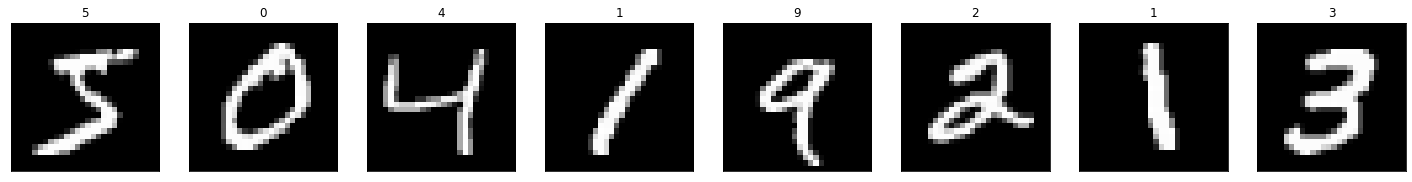

In [6]:
plt.figure(figsize=(25,4))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(y_train[i])

## Define model

In [10]:
def build_model():
  model = Sequential()
  model.add(keras.layers.Input(shape=(28,28)))
  model.add(keras.layers.Flatten())  
  model.add(keras.layers.Dense(units=512, activation='relu'))
  model.add(keras.layers.Dense(units=128, activation='relu'))
  model.add(keras.layers.Dense(units=10, activation='softmax'))
  return model

## Compile and fit model

In [12]:
# Compile model
model = build_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])
# Fit model

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 1.2302 - accuracy: 0.8677 - val_loss: 0.2916 - val_accuracy: 0.9273
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2641 - accuracy: 0.9339 - val_loss: 0.2111 - val_accuracy: 0.9439
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1815 - accuracy: 0.9515 - val_loss: 0.1886 - val_accuracy: 0.9550
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1557 - accuracy: 0.9586 - val_loss: 0.1637 - val_accuracy: 0.9602
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1340 - accuracy: 0.9646 - val_loss: 0.1628 - val_accuracy: 0.9655


In [13]:
# Compile model
model = build_model()
model.compile(optimizer='Adagrad',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])
# Fit model

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.8621 - accuracy: 0.8705 - val_loss: 1.4024 - val_accuracy: 0.9088
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0564 - accuracy: 0.9235 - val_loss: 1.1286 - val_accuracy: 0.9195
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7477 - accuracy: 0.9386 - val_loss: 0.9969 - val_accuracy: 0.9218
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5770 - accuracy: 0.9475 - val_loss: 0.9153 - val_accuracy: 0.9270
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4642 - accuracy: 0.9552 - val_loss: 0.8924 - val_accuracy: 0.9294


In [14]:
# Compile model
model = build_model()
model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])
# Fit model

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 1.7417 - accuracy: 0.8397 - val_loss: 0.5081 - val_accuracy: 0.8866
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6236 - accuracy: 0.8883 - val_loss: 0.5049 - val_accuracy: 0.8684
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5652 - accuracy: 0.9053 - val_loss: 0.8048 - val_accuracy: 0.8803
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5697 - accuracy: 0.9050 - val_loss: 0.6811 - val_accuracy: 0.8847
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6204 - accuracy: 0.9039 - val_loss: 0.7346 - val_accuracy: 0.9081


## Load and compile best model

In [15]:
# load best model
model = build_model()
# compile best model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2421 - accuracy: 0.8566 - val_loss: 0.3545 - val_accuracy: 0.9100
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2735 - accuracy: 0.9305 - val_loss: 0.2630 - val_accuracy: 0.9324
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1782 - accuracy: 0.9526 - val_loss: 0.1681 - val_accuracy: 0.9572
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1481 - accuracy: 0.9606 - val_loss: 0.1783 - val_accuracy: 0.9568
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1303 - accuracy: 0.9662 - val_loss: 0.1511 - val_accuracy: 0.9623


## Evaluate best model

In [16]:
# evaluate best model
model.evaluate(
    x=x_test,
    y=y_test,
    batch_size=64,
)

157/157 [==============================] - 0s 2ms/step - loss: 0.1511 - accuracy: 0.9623


[0.15110087394714355, 0.9623000025749207]

## Get Reports

In [23]:
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 1s 2ms/step


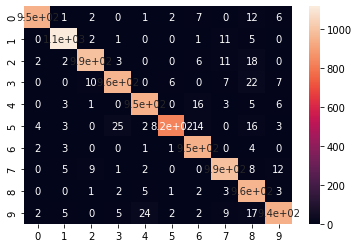

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.95      0.96      1010
           4       0.96      0.97      0.96       982
           5       0.99      0.92      0.95       892
           6       0.95      0.99      0.97       958
           7       0.96      0.96      0.96      1028
           8       0.90      0.98      0.94       974
           9       0.96      0.93      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [24]:
# get report of metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()
print(classification_report(y_test, y_pred))